**Install GetOldTweets3 python library**

In [1]:
!pip install GetoldTweets3

In [0]:
import GetOldTweets3 as got
import re
import string
import pandas as pd
import numpy as np
import datetime
import os

Obtaining tweets based on keyword search

In [0]:
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('diagnosed with Depression today')\
                                           .setSince("2020-01-01")\
                                           .setUntil("2020-04-04")\
                                           .setMaxTweets(200)\
                                           .setLang('en')
tweet = got.manager.TweetManager.getTweets(tweetCriteria)


In [4]:
len(tweet)

200

**Saving the tweets into a csv**

In [0]:
import csv
with open('/content/tweets_latest.csv', 'w') as csvFile:
    fieldnames = ['Tweets', 'Username', 'date', 'handle', 'loc']
    writer = csv.DictWriter(csvFile, fieldnames=fieldnames)
    writer.writeheader()

    for i in tweet:
                     
        # write the data to the file
        writer.writerow({'Username': i.username, 'Tweets': i.text,  
                         'date': i.date, 'handle': i.id, 'loc' : i.geo })

In [0]:
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('diagnosed with PTSD today')\
                                           .setSince("2019-08-08")\
                                           .setUntil("2020-04-04")\
                                           .setMaxTweets(1000)\
                                           .setLang('en')
tweet3 = got.manager.TweetManager.getTweets(tweetCriteria)

In [0]:
import csv
with open('/content/tweets2.csv', 'w') as csvFile:
    fieldnames = ['Tweets', 'Username', 'date', 'hashtags']
    writer = csv.DictWriter(csvFile, fieldnames=fieldnames)
    writer.writeheader()

    for i in tweet2:
                     
        # write the data to the file
        writer.writerow({'Username': i.username, 'Tweets': i.text,  
                         'date': i.formatted_date, 'hashtags': i.hashtags  })

**Extracting Tweets based on usernames**

Using a list "batch" to append all the usernames and extract the tweets from their account

In [0]:
 batch = [['@TheEmuEmi','2017-03-25','2018-03-25'],
			['@EugeniaLeigh','2017-02-01','2018-02-01'],
				['@vkhillier','2017-01-30','2018-01-30'],
        				['@raepkg','2017-01-29','2018-01-29'],        
            				['@VOIDHAYLEE','2017-01-28','2018-01-28'],
                				['@KTMummy','2017-01-24','2018-01-24']] 

In [0]:
#To import the users tweeets into a CSV file
import csv
with open('/content/tweets_of_PTSDUsers.csv', 'a') as csvFile:
  fieldnames = ['Tweets', 'Username', 'date']
  writer = csv.DictWriter(csvFile, fieldnames=fieldnames)
  writer.writeheader()
  for i in batch :
      tweetCriteria = got.manager.TweetCriteria().setUsername(i[0])\
                                    .setSince(i[1])\
                                    .setUntil(i[2])\
                                    .setMaxTweets(2000)\
                                    .setLang('en')
      tweet = got.manager.TweetManager.getTweets(tweetCriteria)
      # outF = open("/content/tweets_FromUsers.csv", "a")
      for j in tweet:
            
          # write line to output file
          writer.writerow({'Username': j.username, 'Tweets': j.text,'date': j.formatted_date })

**Performing word Cloud Analysis on the tweets**

In [0]:
import io
df_pre = pd.read_csv(io.BytesIO(uploaded['tweets_PTSD_PreDiagnosis.csv']))

Loading a file from Local machine

In [0]:
from google.colab import files
uploaded = files.upload()

Saving All_PTSD_tweets.csv to All_PTSD_tweets.csv
Saving tweets_PostDiagnosis.csv to tweets_PostDiagnosis.csv
Saving tweets_PreDiagnosis.csv to tweets_PreDiagnosis.csv


In [0]:
import io
df_post = pd.read_csv(io.BytesIO(uploaded['tweets_PostDiagnosis.csv']))
df_pre = pd.read_csv(io.BytesIO(uploaded['tweets_PreDiagnosis.csv']))
df_all = pd.read_csv(io.BytesIO(uploaded['All_PTSD_tweets.csv']))

In [0]:
df_post.head()

In [0]:
df_pre.head()

In [0]:
df_all.head()

In [0]:
post_diag_words = ' '.join([text for text in df_post['Tweets']])
pre_diag_words = '\\n'.join([text for text in df_pre['Tweets']])
all_words = ' '.join([text for text in df_all['Tweets']])

In [0]:
 pip install wordcloud

In [0]:
from wordcloud import WordCloud


In [0]:
import matplotlib.pyplot as plt

Pre Diagnosis Words

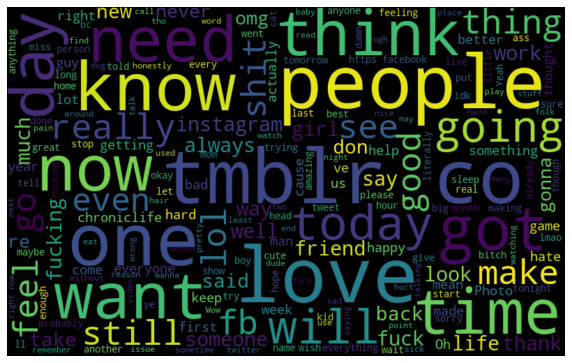

In [0]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pre_diag_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Post Diagnosis Words

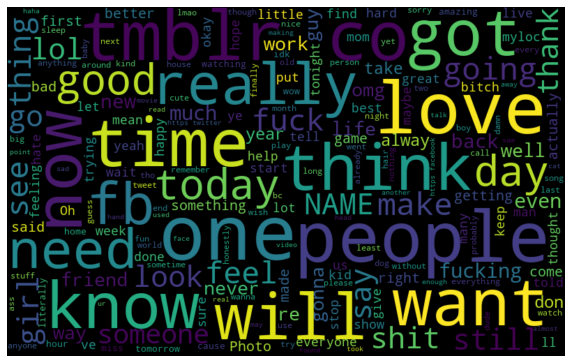

In [0]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(post_diag_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

All Tweets Words

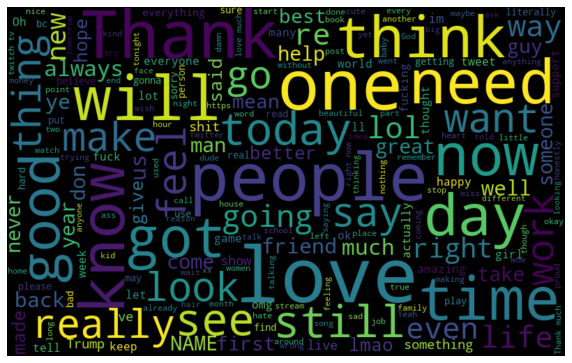

In [0]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Data cleaning

In [0]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_pre.csv to cleaned_pre.csv


In [0]:
import io
cleaned_pre = pd.read_csv(io.BytesIO(uploaded['cleaned_pre.csv']))

In [0]:
pre_diag_words = '\\n'.join([text for text in cleaned_pre['Tweets']])

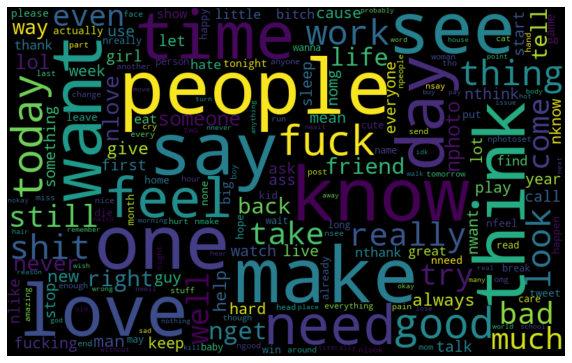

In [0]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pre_diag_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
plt.savefig("pre_diag.jpg")
files.download("pre_diag.jpg") 

For Post Diagnosis tweets

In [0]:
df_post.head()

In [0]:
from google.colab import files
uploaded = files.upload('cleaned')

In [0]:
import io
cleaned_post = pd.read_csv(io.BytesIO(uploaded['postDiagTweets.csv']))

In [0]:
post_diag_words = '\\n'.join([text for text in cleaned_post['Tweets']])

In [0]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pre_diag_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [0]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(post_diag_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()